<a href="https://colab.research.google.com/github/vschs007/loanamout/blob/main/loanamount.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#loading the datasets
dataset = pd.read_csv("test.csv")
#dtrain = pd.read_csv("train.csv")

In [ ]:
dtrain.head()

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Expense Type 2,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,C-36995,Frederica Shealy,F,56,1933.05,Low,Working,Sales staff,Semi-Urban,72809.58,241.08,N,N,3.0,809.44,0,NaN,746,1933.05,4,Rural,1,119933.46,54607.18
1,C-33999,America Calderone,M,32,4952.91,Low,Working,NaN,Semi-Urban,46837.47,495.81,N,Y,1.0,780.40,0,Unpossessed,608,4952.91,2,Rural,1,54791.00,37469.98
2,C-3770,Rosetta Verne,F,65,988.19,High,Pensioner,NaN,Semi-Urban,45593.04,171.95,N,Y,1.0,833.15,0,Unpossessed,546,988.19,2,Urban,0,72440.58,36474.43
3,C-26480,Zoe Chitty,F,65,NaN,High,Pensioner,NaN,Rural,80057.92,298.54,N,Y,2.0,832.70,1,Unpossessed,890,NaN,2,Semi-Urban,1,121441.51,56040.54
4,C-23459,Afton Venema,F,31,2614.77,Low,Working,High skill tech staff,Semi-Urban,113858.89,491.41,N,Y,NaN,745.55,1,Active,715,2614.77,4,Semi-Urban,1,208567.91,74008.28


In [ ]:
dtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer ID                  30000 non-null  object 
 1   Name                         30000 non-null  object 
 2   Gender                       29947 non-null  object 
 3   Age                          30000 non-null  int64  
 4   Income (USD)                 25424 non-null  float64
 5   Income Stability             28317 non-null  object 
 6   Profession                   30000 non-null  object 
 7   Type of Employment           22730 non-null  object 
 8   Location                     30000 non-null  object 
 9   Loan Amount Request (USD)    30000 non-null  float64
 10  Current Loan Expenses (USD)  29828 non-null  float64
 11  Expense Type 1               30000 non-null  object 
 12  Expense Type 2               30000 non-null  object 
 13  Dependents      

In [ ]:
dtrain.columns

Index(['Customer ID', 'Name', 'Gender', 'Age', 'Income (USD)',
       'Income Stability', 'Profession', 'Type of Employment', 'Location',
       'Loan Amount Request (USD)', 'Current Loan Expenses (USD)',
       'Expense Type 1', 'Expense Type 2', 'Dependents', 'Credit Score',
       'No. of Defaults', 'Has Active Credit Card', 'Property ID',
       'Property Age', 'Property Type', 'Property Location', 'Co-Applicant',
       'Property Price', 'Loan Sanction Amount (USD)'],
      dtype='object')

In [ ]:
dtrain["Gender"].value_counts()

M    15053
F    14894
Name: Gender, dtype: int64

In [ ]:
dtrain["Profession"].value_counts()

Working                 16926
Commercial associate     7962
Pensioner                2740
State servant            2366
Businessman                 2
Unemployed                  2
Maternity leave             1
Student                     1
Name: Profession, dtype: int64

In [ ]:
dtrain["Property Location"].value_counts()

Semi-Urban    10387
Rural         10041
Urban          9216
Name: Property Location, dtype: int64

In [ ]:
 dtrain["Income Stability"].value_counts()

Low     25751
High     2566
Name: Income Stability, dtype: int64

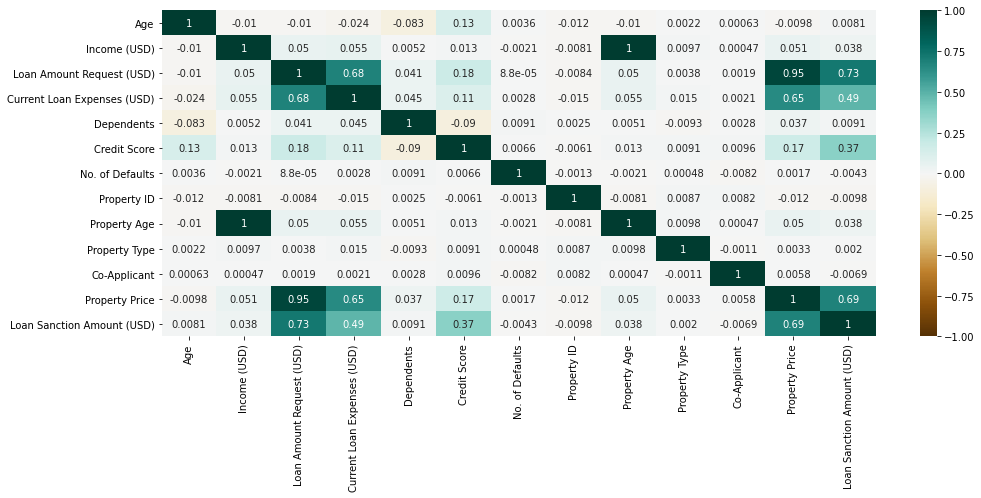

In [ ]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(dtrain.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')

In [ ]:
dtrain.isna().sum()

Customer ID                       0
Name                              0
Gender                           53
Age                               0
Income (USD)                   4576
Income Stability               1683
Profession                        0
Type of Employment             7270
Location                          0
Loan Amount Request (USD)         0
Current Loan Expenses (USD)     172
Expense Type 1                    0
Expense Type 2                    0
Dependents                     2493
Credit Score                   1703
No. of Defaults                   0
Has Active Credit Card         1566
Property ID                       0
Property Age                   4850
Property Type                     0
Property Location               356
Co-Applicant                      0
Property Price                    0
Loan Sanction Amount (USD)      340
dtype: int64

In [ ]:
#data preprocessing
dtrain = dtrain.drop(['Gender','Name','Customer ID'],axis =1)

In [ ]:
dtrain.isna().sum()

Age                               0
Income (USD)                   4576
Income Stability               1683
Profession                        0
Type of Employment             7270
Location                          0
Loan Amount Request (USD)         0
Current Loan Expenses (USD)     172
Expense Type 1                    0
Expense Type 2                    0
Dependents                     2493
Credit Score                   1703
No. of Defaults                   0
Has Active Credit Card         1566
Property ID                       0
Property Age                   4850
Property Type                     0
Property Location               356
Co-Applicant                      0
Property Price                    0
Loan Sanction Amount (USD)      340
dtype: int64

In [ ]:
#applying one hot encoder to income stability.
d = {'Low':0,'High':1}
k = {'Y':1,'N':0}
f = {'Unpossessed':0,'Inactive':0,'Active':1}


dtrain['Income Stability'] = dtrain['Income Stability'].map(d)
dtrain['Has Active Credit Card'] = dtrain['Has Active Credit Card'].map(f)
dtrain['Expense Type 1'] = dtrain['Expense Type 1'].map(k)
dtrain['Expense Type 2'] = dtrain['Expense Type 2'].map(k)

In [ ]:
dtrain['Income Stability'] = dtrain['Income Stability'].fillna(0)
dtrain["Income (USD)"].fillna(dtrain["Income (USD)"].mode()[0], inplace=True)
dtrain = dtrain.drop(['Type of Employment','Location','Age'],axis=1)
dtrain = dtrain.drop(['Co-Applicant'],axis=1)
dtrain = dtrain.drop(['Property Location'],axis=1)
dtrain = dtrain.drop(['Property Age'],axis=1)


dtrain['Current Loan Expenses (USD)'] = dtrain['Current Loan Expenses (USD)'].fillna(0)
dtrain['Dependents'] = dtrain['Dependents'].fillna(0)
dtrain["Credit Score"].fillna(dtrain["Credit Score"].mode()[0], inplace=True)
dtrain["Property Price"].fillna(dtrain["Property Price"].mode()[0], inplace=True)

#dtrain = dtrain.drop(['Location'],axis=1)


dtrain['Has Active Credit Card'] = dtrain['Has Active Credit Card'].fillna(0)
dtrain.isna().sum()

Income (USD)                     0
Income Stability                 0
Profession                       0
Loan Amount Request (USD)        0
Current Loan Expenses (USD)      0
Expense Type 1                   0
Expense Type 2                   0
Dependents                       0
Credit Score                     0
No. of Defaults                  0
Has Active Credit Card           0
Property ID                      0
Property Type                    0
Property Price                   0
Loan Sanction Amount (USD)     340
dtype: int64

In [ ]:
dtrain = dtrain.drop(['Profession'],axis=1)
dtrain = dtrain.drop(['Property Price'],axis=1)


In [ ]:
#dtrain = dtrain.drop(['Expense Type 1','Expense Type 2'],axis=1)

In [ ]:
dtrain = dtrain.drop(['Property ID','Property Type'],axis=1)

KeyError: ignored

In [ ]:
dtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Income (USD)                 30000 non-null  float64
 1   Income Stability             30000 non-null  float64
 2   Loan Amount Request (USD)    30000 non-null  float64
 3   Current Loan Expenses (USD)  30000 non-null  float64
 4   Expense Type 1               30000 non-null  int64  
 5   Expense Type 2               30000 non-null  int64  
 6   Dependents                   30000 non-null  float64
 7   Credit Score                 30000 non-null  float64
 8   No. of Defaults              30000 non-null  int64  
 9   Has Active Credit Card       30000 non-null  float64
 10  Loan Sanction Amount (USD)   29660 non-null  float64
dtypes: float64(8), int64(3)
memory usage: 2.5 MB


In [ ]:
dtrain.isnull().any()



Income (USD)                   False
Income Stability               False
Loan Amount Request (USD)      False
Current Loan Expenses (USD)    False
Expense Type 1                 False
Expense Type 2                 False
Dependents                     False
Credit Score                   False
No. of Defaults                False
Has Active Credit Card         False
Loan Sanction Amount (USD)      True
dtype: bool

In [ ]:
dtrain.isna().any()

Income (USD)                   False
Income Stability               False
Loan Amount Request (USD)      False
Current Loan Expenses (USD)    False
Expense Type 1                 False
Expense Type 2                 False
Dependents                     False
Credit Score                   False
No. of Defaults                False
Has Active Credit Card         False
Loan Sanction Amount (USD)      True
dtype: bool

In [ ]:
dtrain.head()

,Income (USD),Income Stability,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Expense Type 2,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Loan Sanction Amount (USD)
0,1933.05,0.0,72809.58,241.08,0,0,3.0,809.44,0,0.0,54607.18
1,4952.91,0.0,46837.47,495.81,0,1,1.0,780.40,0,0.0,37469.98
2,988.19,1.0,45593.04,171.95,0,1,1.0,833.15,0,0.0,36474.43
3,1608.43,1.0,80057.92,298.54,0,1,2.0,832.70,1,0.0,56040.54
4,2614.77,0.0,113858.89,491.41,0,1,0.0,745.55,1,1.0,74008.28


In [ ]:
#dtrain["Loan Sanction Amount (USD)"] = dtrain["Loan Sanction Amount (USD)"].map(lambda x: x*1000)


In [ ]:
dtrain.head()

,Income (USD),Income Stability,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Expense Type 2,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Loan Sanction Amount (USD)
0,1933.05,0.0,72809.58,241.08,0,0,3.0,809.44,0,0.0,54607.18
1,4952.91,0.0,46837.47,495.81,0,1,1.0,780.40,0,0.0,37469.98
2,988.19,1.0,45593.04,171.95,0,1,1.0,833.15,0,0.0,36474.43
3,1608.43,1.0,80057.92,298.54,0,1,2.0,832.70,1,0.0,56040.54
4,2614.77,0.0,113858.89,491.41,0,1,0.0,745.55,1,1.0,74008.28


In [ ]:
dtrain["Loan Amount Request (USD)"] = dtrain["Loan Amount Request (USD)"].map(lambda x: x/1000)

In [ ]:
dtrain =dtrain.dropna(0)

In [ ]:
Y= dtrain["Loan Sanction Amount (USD)"]
X = dtrain.drop(["Loan Sanction Amount (USD)"], axis=1)




In [ ]:
#X = X.fillna(0)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(23728, 10)
(5932, 10)
(23728,)
(5932,)


In [ ]:
y_train.values

array([ 78815.63,  55470.72, 101505.89, ...,  25742.5 ,      0.  ,
        59941.83])

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X= StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

y_pred = regressor.predict(X_test)

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
score = regressor.score(X_test, y_test)

In [ ]:
print(score)

0.6015627345337637


In [ ]:
print(y_pred)

[ 27675.79184883  53482.73582915 252991.90330406 ...  14454.40467122
   6333.97053318   -964.38113143]


In [ ]:
dtrain['Predictions']= y_pred

In [ ]:
dtrain.to_csv('y_pred2.csv')

In [ ]:
#predicting for dataset
dataset = dataset.drop(['Gender','Name'],axis =1)

In [ ]:
dataset.head()


,Customer ID,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Expense Type 2,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price
0,C-26247,47,3472.69,Low,Commercial associate,Managers,Semi-Urban,137088.98,396.72,N,N,2.0,799.14,0,Unpossessed,843,3472.69,2,Urban,1,236644.5
1,C-35067,57,1184.84,Low,Working,Sales staff,Rural,104771.59,463.76,Y,Y,2.0,833.31,0,Unpossessed,22,1184.84,1,Rural,1,142357.3
2,C-34590,52,1266.27,Low,Working,NaN,Semi-Urban,176684.91,493.15,N,Y,3.0,627.44,0,Unpossessed,1,1266.27,1,Urban,1,300991.24
3,C-16668,65,1369.72,High,Pensioner,NaN,Rural,97009.18,446.15,N,Y,2.0,833.20,0,Inactive,730,1369.72,1,Semi-Urban,0,125612.1
4,C-12196,60,1939.23,High,Pensioner,NaN,Urban,109980.00,370.10,N,N,NaN,NaN,0,NaN,356,1939.23,4,Semi-Urban,1,180908.0


In [ ]:
dataset['Income Stability'] = dataset['Income Stability'].fillna(0)
dataset["Income (USD)"].fillna(dataset["Income (USD)"].mode()[0], inplace=True)
dataset = dataset.drop(['Type of Employment','Location','Age'],axis=1)
dataset = dataset.drop(['Co-Applicant'],axis=1)
dataset = dataset.drop(['Property Location'],axis=1)
dataset = dataset.drop(['Property Age'],axis=1)


dataset['Current Loan Expenses (USD)'] = dataset['Current Loan Expenses (USD)'].fillna(0)
dataset['Dependents'] = dataset['Dependents'].fillna(0)
dataset["Credit Score"].fillna(dataset["Credit Score"].mode()[0], inplace=True)
dataset["Property Price"].fillna(dataset["Property Price"].mode()[0], inplace=True)

#dtrain = dtrain.drop(['Location'],axis=1)


dataset['Has Active Credit Card'] = dataset['Has Active Credit Card'].fillna(0)
dataset.isna().sum()

Customer ID                    0
Income (USD)                   0
Income Stability               0
Profession                     0
Loan Amount Request (USD)      0
Current Loan Expenses (USD)    0
Expense Type 1                 0
Expense Type 2                 0
Dependents                     0
Credit Score                   0
No. of Defaults                0
Has Active Credit Card         0
Property ID                    0
Property Type                  0
Property Price                 0
dtype: int64

In [ ]:
dataset = dataset.drop(['Profession'],axis=1)
dataset = dataset.drop(['Property Price'],axis=1)


In [ ]:
#dataset = dataset.drop(['Expense Type 1','Expense Type 2'],axis=1)

KeyError: ignored

In [ ]:
dataset = dataset.drop(['Property ID','Property Type'],axis=1)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer ID                  20000 non-null  object 
 1   Income (USD)                 20000 non-null  float64
 2   Income Stability             20000 non-null  object 
 3   Loan Amount Request (USD)    20000 non-null  float64
 4   Current Loan Expenses (USD)  20000 non-null  float64
 5   Expense Type 1               20000 non-null  object 
 6   Expense Type 2               20000 non-null  object 
 7   Dependents                   20000 non-null  float64
 8   Credit Score                 20000 non-null  float64
 9   No. of Defaults              20000 non-null  int64  
 10  Has Active Credit Card       20000 non-null  object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.7+ MB


In [ ]:
#applying one hot encoder to income stability.
d = {'Low':0,'High':1}
k = {'Y':1,'N':0}
f = {'Unpossessed':0,'Inactive':0,'Active':1}


dataset['Income Stability'] = dataset['Income Stability'].map(d)
dataset['Has Active Credit Card'] = dataset['Has Active Credit Card'].map(f)
dataset['Expense Type 1'] = dataset['Expense Type 1'].map(k)
dataset['Expense Type 2'] = dataset['Expense Type 2'].map(k)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer ID                  20000 non-null  object 
 1   Income (USD)                 20000 non-null  float64
 2   Income Stability             19187 non-null  float64
 3   Loan Amount Request (USD)    20000 non-null  float64
 4   Current Loan Expenses (USD)  20000 non-null  float64
 5   Expense Type 1               20000 non-null  int64  
 6   Expense Type 2               20000 non-null  int64  
 7   Dependents                   20000 non-null  float64
 8   Credit Score                 20000 non-null  float64
 9   No. of Defaults              20000 non-null  int64  
 10  Has Active Credit Card       18924 non-null  float64
dtypes: float64(7), int64(3), object(1)
memory usage: 1.7+ MB


In [ ]:
#dataset["Loan Amount Request (USD)"] = dataset["Loan Amount Request (USD)"].map(lambda x: x*1000)

In [ ]:
dataset =dataset.fillna(0)

In [ ]:
Yd= dataset["Customer ID"]
Xd = dataset.drop(["Customer ID"], axis=1)

In [ ]:
regressor.predict(Xd)

array([4.67198815e+09, 3.57524500e+09, 6.02117031e+09, ...,
       6.38938592e+08, 3.25682652e+09, 3.67801864e+09])

In [ ]:
ydatasetpred = regressor.predict(Xd)

In [ ]:
ydatasetpred= ydatasetpred/100

In [ ]:
#dataset.to_csv('ydatasetpred.csv')

In [ ]:
dataset["Sanction loan"]=ydatasetpred

In [ ]:
dataset.to_csv('resultf.csv')